In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import the DataFrame

In [3]:
clean_data=pd.read_csv("API_info_clean.csv")

In [102]:
clean_data.head(10)

,Unnamed: 0,Date,Route,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Year,Month,Attempt/Success
0,0,11/27/2015,Disappointment Cleaver,2.0,0.0,0.0,13.643750,-3.154630,19.715000,44.803355,68.004167,88.496250,2015,11,A
1,1,11/21/2015,Disappointment Cleaver,3.0,0.0,0.0,13.749583,-0.388889,21.690708,3.614309,117.549667,93.660417,2015,11,A
2,2,10/15/2015,Disappointment Cleaver,2.0,0.0,0.0,13.461250,8.026620,27.211250,27.622108,259.121375,138.387000,2015,10,A
3,3,10/13/2015,Little Tahoma,8.0,0.0,0.0,13.532083,4.988657,28.335708,31.528848,279.779167,176.382667,2015,10,A
4,4,10/9/2015,Disappointment Cleaver,2.0,0.0,0.0,13.216250,3.478009,74.329167,104.829725,264.687500,27.791292,2015,10,A
5,5,10/3/2015,Disappointment Cleaver,10.0,0.0,0.0,13.577500,-0.098380,62.337083,21.122655,153.931667,196.375208,2015,10,A
6,6,10/3/2015,Disappointment Cleaver,2.0,0.0,0.0,13.577500,-0.098380,62.337083,21.122655,153.931667,196.375208,2015,10,A
7,7,10/2/2015,Kautz Glacier,2.0,0.0,0.0,13.505000,2.257870,47.017375,10.373672,247.318333,176.265542,2015,10,A
8,8,10/2/2015,Disappointment Cleaver,2.0,0.0,0.0,13.505000,2.257870,47.017375,10.373672,247.318333,176.265542,2015,10,A
9,9,9/30/2015,Disappointment Cleaver,2.0,0.0,0.0,13.483333,3.738657,57.369583,18.186749,216.934167,202.812750,2015,9,A


## Visualization of the data

### Visualization of data:
- Comparing successes vs attempts
- More successful routes
- Most popular routes
- Compare the success ratio with the temperature, humidity and wind speed
- Analyze if the success ratio would be high in November 2020

In [5]:
# Describe the data
clean_data.describe()

,Unnamed: 0,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Year,Month
count,4085.000000,4077.000000,4077.000000,4077.000000,1895.000000,1903.000000,1903.000000,1903.000000,1895.000000,1895.000000,4085.000000,4085.000000
mean,2034.008813,5.139318,2.710817,0.494576,13.502638,4.778407,48.042705,16.860158,155.335106,261.602649,2014.469523,6.680783
std,1179.367030,3.813516,3.534148,0.462450,0.070450,5.134625,22.353242,14.713656,91.106436,110.452313,0.554886,1.386211
min,0.000000,1.000000,0.000000,0.000000,12.987917,-13.980648,12.363500,0.000000,13.490000,0.000000,2014.000000,1.000000
25%,1013.000000,2.000000,0.000000,0.000000,13.453333,0.732639,30.253750,7.097659,55.173375,221.494000,2014.000000,6.000000
50%,2034.000000,3.000000,2.000000,0.583333,13.492500,4.471759,46.140417,11.707814,171.633375,304.605708,2014.000000,7.000000
75%,3055.000000,8.000000,4.000000,1.000000,13.546250,9.238194,65.348333,23.589505,235.496667,351.973292,2015.000000,8.000000
max,4076.000000,26.000000,71.000000,1.000000,13.794583,13.418750,100.000000,104.829725,280.383333,368.056083,2020.000000,12.000000


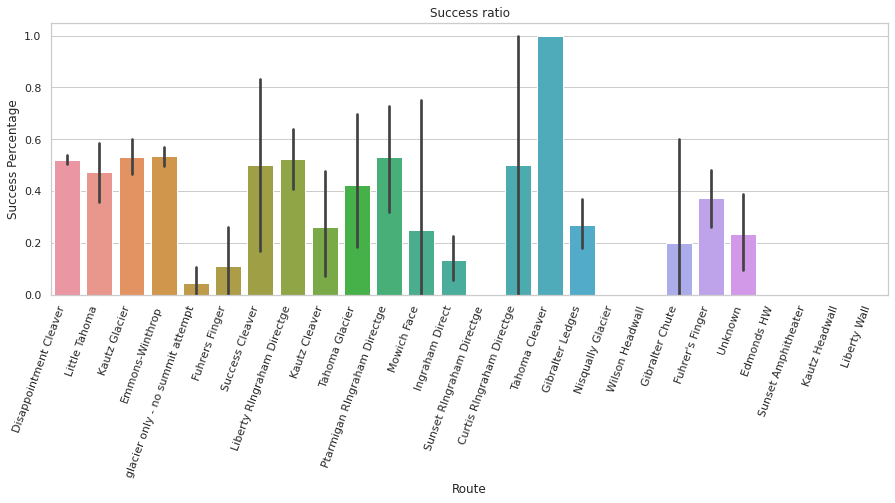

In [99]:
# Plot showing success ratio, indicates the success percentage in each of the routes
fig, ax = plt.subplots(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Route", y="Success Percentage", data=clean_data)
plt.xticks(rotation=70, ha='right')
plt.title("Success ratio")
plt.show()


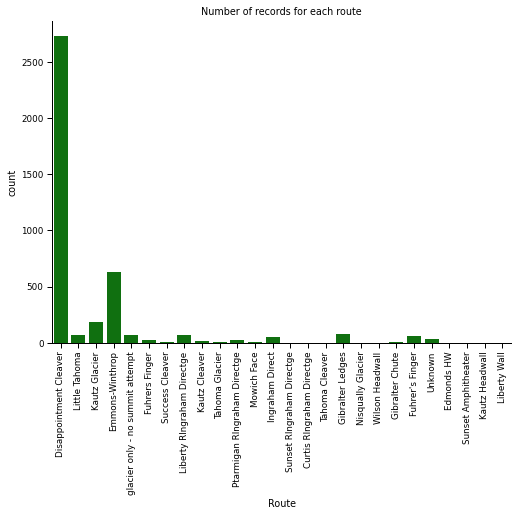

In [81]:
# Plot showing the most popular route
g = sns.catplot(x = 'Route', data=clean_data, aspect=1.5, kind="count", color="g")
g.set_xticklabels(rotation=90)
plt.title('Number of records for each route')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

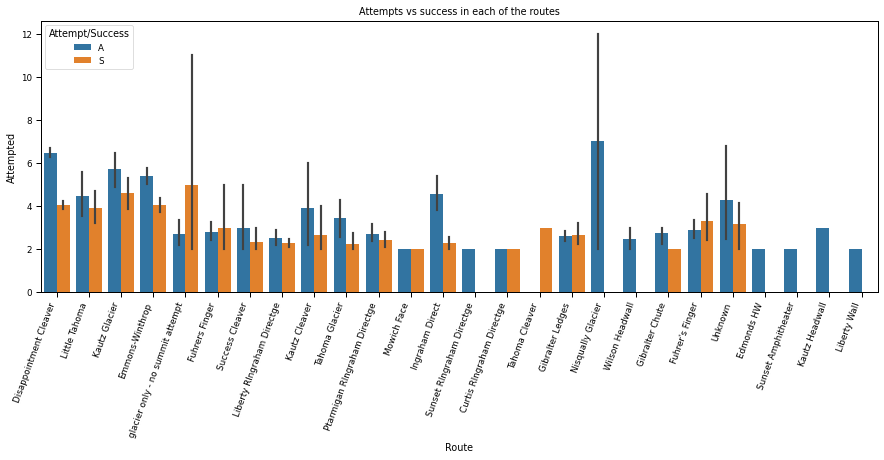

In [42]:
# Plot showing success and the attemp ratio, indicates the success percentage in each of the routes

clean_data["Attempt/Success"]= "S"

def A_S(row):
    if row["Success Percentage"]<1:
        return "A"
    elif row["Success Percentage"]== "NaN":
        return "NaN"
    else:
        return "S"
    
clean_data["Attempt/Success"]=clean_data.apply(A_S, axis=1)


fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Route", y="Attempted", hue="Attempt/Success", data=clean_data, ax=ax)
plt.xticks(rotation=70, ha='right')
plt.title("Attempts vs success in each of the routes")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

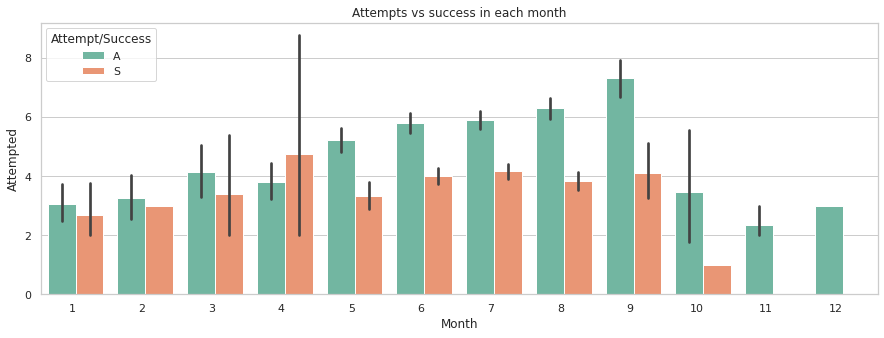

In [109]:
# Plot showing success and the attemp ratio, indicates the success percentage in each of the months


fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Month", y="Attempted", hue="Attempt/Success", data=clean_data, ax=ax, palette="Set2")
plt.xticks(ha='right')
plt.title("Attempts vs success in each month")

plt.show

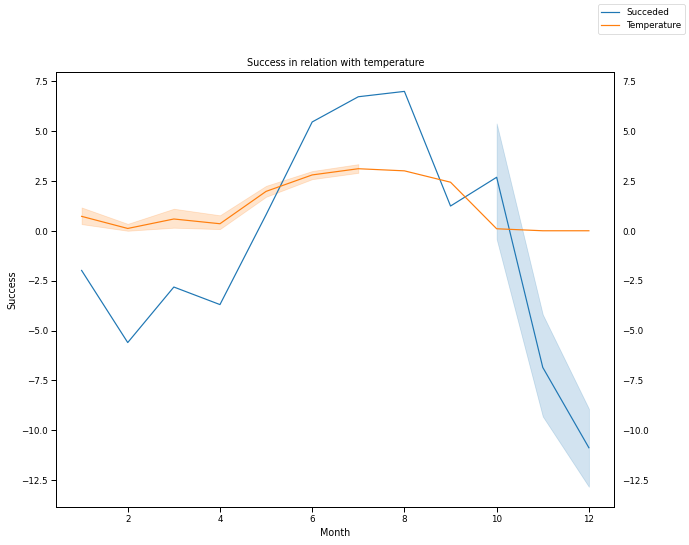

In [92]:
# Plot showing the relation between success and temperature

f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.lineplot(x="Month", y="Temperature AVG", data=clean_data)
sns.lineplot(x="Month", y="Succeeded", data=clean_data)

ax.tick_params(labeltop=False, labelright=True)
ax.set_ylabel("Temperature AVG")
ax.set_ylabel("Success")
plt.title("Success in relation with temperature")

f.legend(labels=["Succeded", "Temperature"])
plt.show()


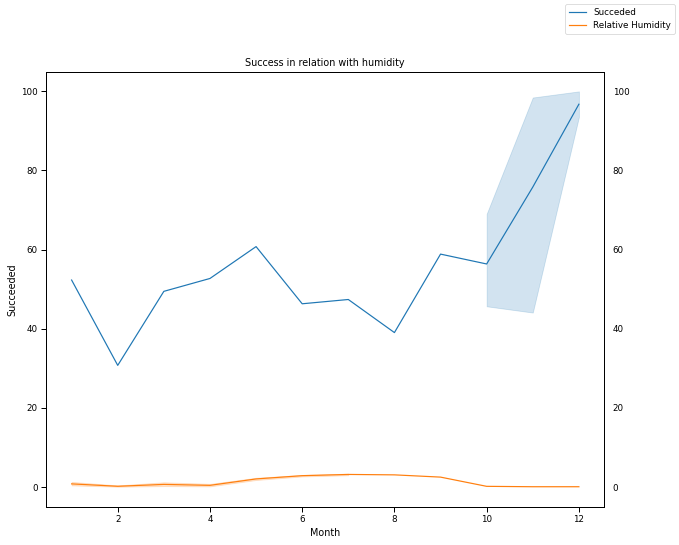

In [44]:
# Plot showing the relation between success and humidity

f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.lineplot(x="Month", y="Relative Humidity AVG", data=clean_data)
sns.lineplot(x="Month", y="Succeeded", data=clean_data)

ax.tick_params(labeltop=False, labelright=True)
ax.set_ylabel("Relative Humidity AVG")
ax.set_ylabel("Succeeded")
plt.title("Success in relation with humidity")

f.legend(labels=["Succeded", "Relative Humidity"])
plt.show()

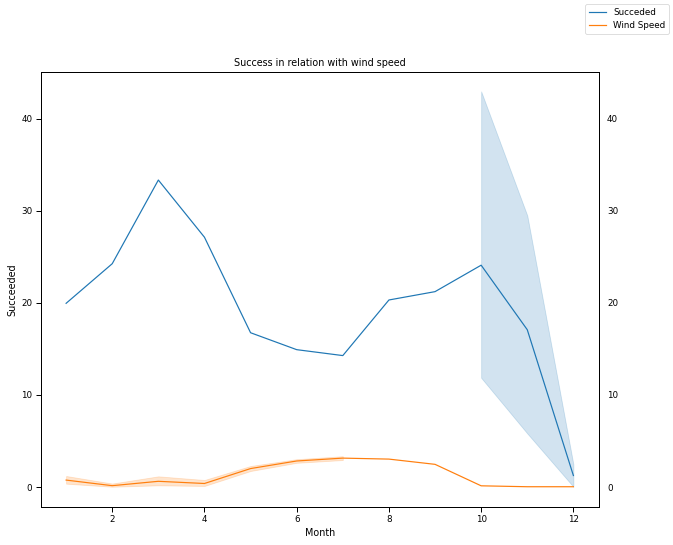

In [45]:
# Plot showing the relation between success and wind speed

f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.lineplot(x="Month", y="Wind Speed Daily AVG", data=clean_data)
sns.lineplot(x="Month", y="Succeeded", data=clean_data)

ax.tick_params(labeltop=False, labelright=True)
ax.set_ylabel("Wind Speed Daily AVG")
ax.set_ylabel("Succeeded")
plt.title("Success in relation with wind speed")

f.legend(labels=["Succeded", "Wind Speed"])
plt.show()

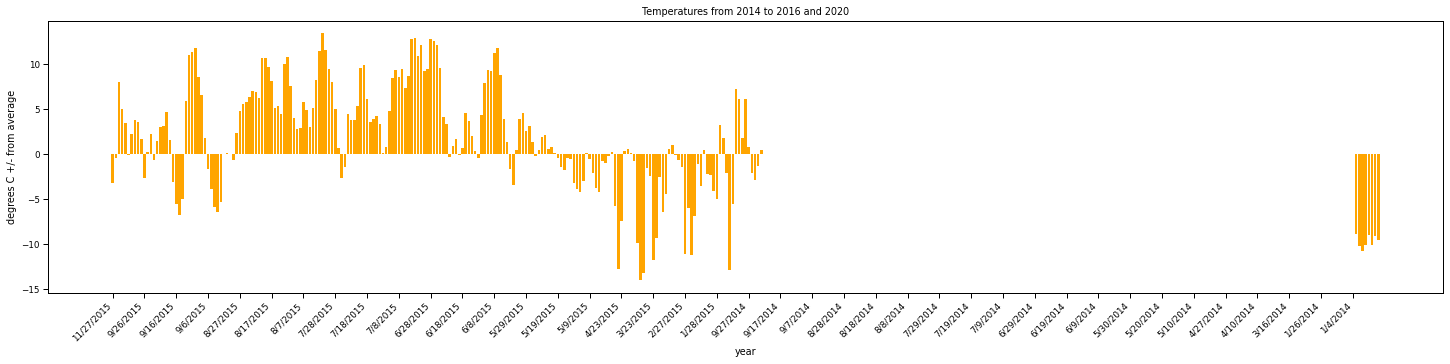

In [77]:
# Plot showing the temperature through the different dates to see if the conditions of 2020 are good for success

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Temperatures from 2014 to 2016 and 2020")
plt.xlabel("year")
plt.ylabel("degrees C +/- from average")
plt.bar(clean_data["Date"], clean_data["Temperature AVG"], color="orange")
plt.xticks(rotation=45, ha='right')
ax.set_xticks(ax.get_xticks()[::10])
plt.show()

#temperature below -5 degrees --> not good conditions for success, as success is higher when temperatures are around 2.5 degrees


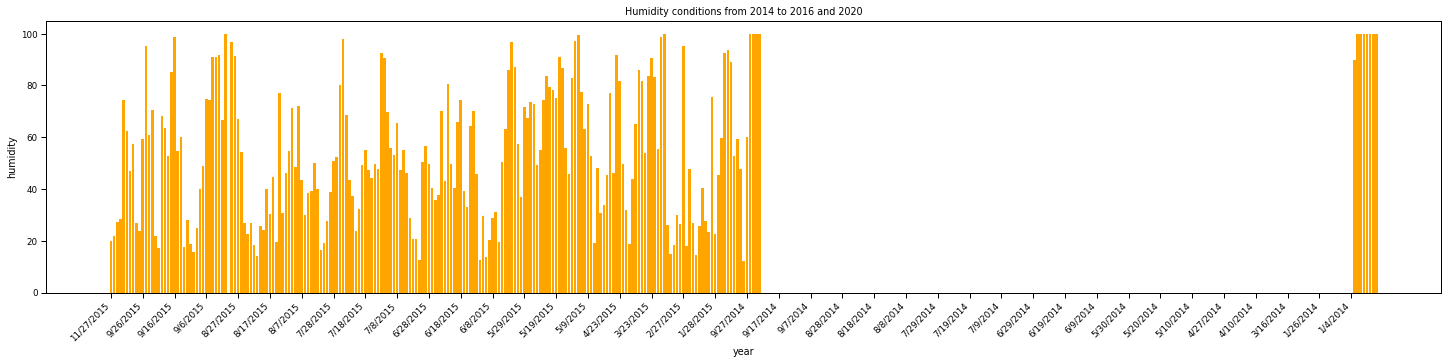

In [79]:
# Plot showing the humidity through the different dates to see if the conditions of 2020 are good for success

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Humidity conditions from 2014 to 2016 and 2020")
plt.xlabel("year")
plt.ylabel("humidity")
plt.bar(clean_data["Date"], clean_data["Relative Humidity AVG"], color="orange")
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation=45, ha='right')
plt.show()
# very high humidity --> bad conditions

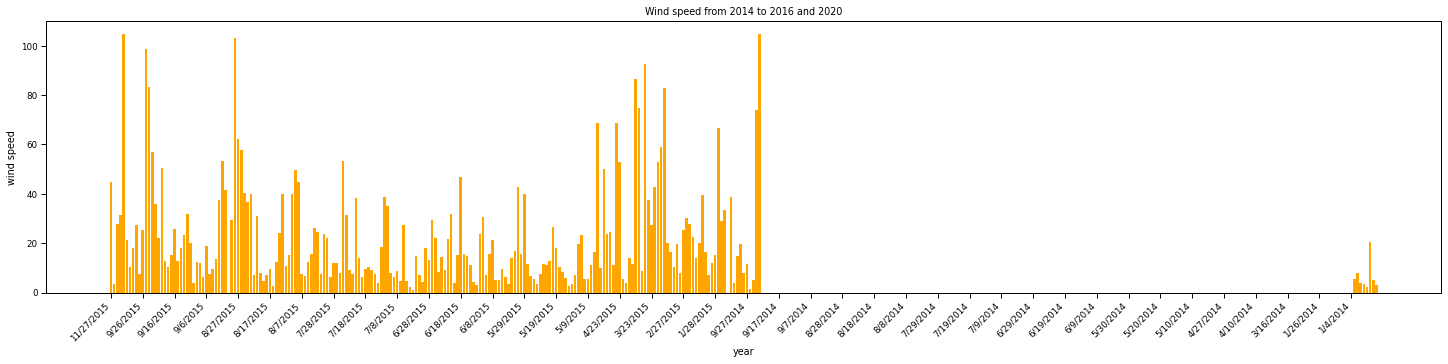

In [80]:
# Plot showing the wind speed through the different dates to see if the conditions of 2020 are good for success

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Wind speed from 2014 to 2016 and 2020")
plt.xlabel("year")
plt.ylabel("wind speed")
plt.bar(clean_data["Date"], clean_data["Wind Speed Daily AVG"], color="orange")
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation=45, ha='right')
plt.show()
# very low wind speed --> good conditions for success

### Conclusion
The conditions in general in November 2020 are not good conditions for success as, although there is a low wind speed, the temperatures are extremely low and there is a high percentage of humidity. Moreover, looking at the graph that shows attempts and successes by month it can be observed that in November there are very little successes.